In [1]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
from agents import *
import numpy as np
from tqdm.notebook import tqdm

In reinforce,
$$\nabla J(\theta) = \mathbb{E}_\theta \left[ \sum_{t=0}^T \left(\sum_{k=t}^T R_k \right)\nabla_{\theta} log\pi_{\theta}(a_t|x_t) \right]$$
This expectation is over episodes played using the policy $\pi_{\theta}$

## David's agent

After playing an entire episode using policy $\pi_{\theta}(a|x)$,
$$\nabla J(\theta) = \sum_{t=0}^T \left(\sum_{k=t}^T R_k \right)\nabla_{\theta} log\pi_{\theta}(a_t|x_t)$$
This is one episode MC estimate of the true gradient

In [2]:
# train david's agent
david_agent = DavidAgent(env_name='CartPole-v1')
history = david_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_david.pth')

Episode: 100 | score: 34.8645634846063
Episode: 200 | score: 51.072074106089374
Episode: 300 | score: 43.402209098411646
Episode: 400 | score: 69.92923887325469
Episode: 500 | score: 120.54966575659725
Episode: 600 | score: 225.2728357142823
Episode: 700 | score: 299.0840386497455
Episode: 800 | score: 334.421159781908
Episode: 900 | score: 378.82104647360546
Episode: 1000 | score: 419.5477016449615
Episode: 1100 | score: 449.825970786284
Episode: 1200 | score: 460.13418206033805
Episode: 1300 | score: 478.6103169251279
Episode: 1400 | score: 490.72757857932635
Episode: 1500 | score: 472.76254525943153
Episode: 1600 | score: 490.99084020005535
Episode: 1700 | score: 485.3957169166106
Episode: 1800 | score: 477.8590241398241
Episode: 1900 | score: 488.56123845964123
Episode: 2000 | score: 490.88988280807223


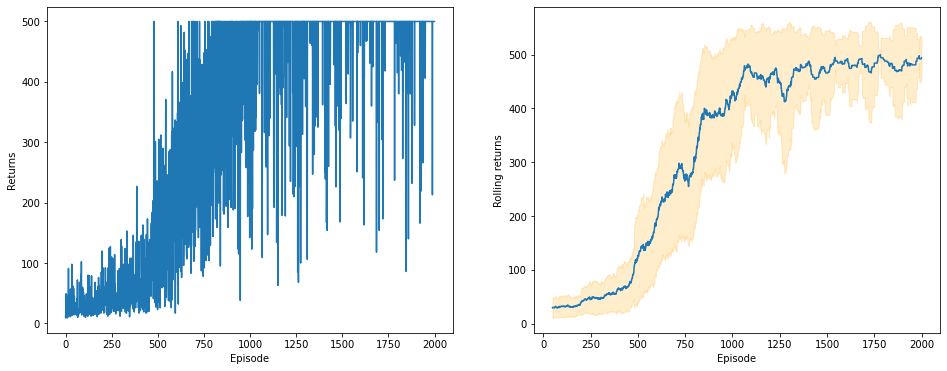

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

## Sutton's agent

After playing an entire episode $\{(x_t, a_t, r_t)\}_{t=0}^T$ using policy $\pi_{\theta_0}(a|x)$, gradient is updated for each $(x_t, a_t, r_t)$ observed:
$$\nabla J(\theta_t) = \left(\sum_{k=t}^T R_k \right)\nabla_{\theta_t} log\pi_{\theta_t}(a_t|x_t)$$

In [21]:
# train sutton's agent
sutton_agent = SuttonAgent(env_name='CartPole-v1')
history = sutton_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_sutton.pth')

Episode: 100 | score: 51.864558536933565
Episode: 200 | score: 343.3243238491265
Episode: 300 | score: 427.9694714111452
Episode: 400 | score: 493.3734592996437
Episode: 500 | score: 388.0114293445003
Episode: 600 | score: 480.57297813573587
Episode: 700 | score: 336.2294645040263
Episode: 800 | score: 499.9881652423359
Episode: 900 | score: 398.7037227626224
Episode: 1000 | score: 488.1795201051043
Episode: 1100 | score: 478.6880886931158
Episode: 1200 | score: 406.80817150005856
Episode: 1300 | score: 301.4742014513267
Episode: 1400 | score: 426.3222422662101
Episode: 1500 | score: 462.6393848899136
Episode: 1600 | score: 420.1443400611748
Episode: 1700 | score: 495.57807990964767
Episode: 1800 | score: 430.70294811670215
Episode: 1900 | score: 479.51577678682355
Episode: 2000 | score: 464.41375006633


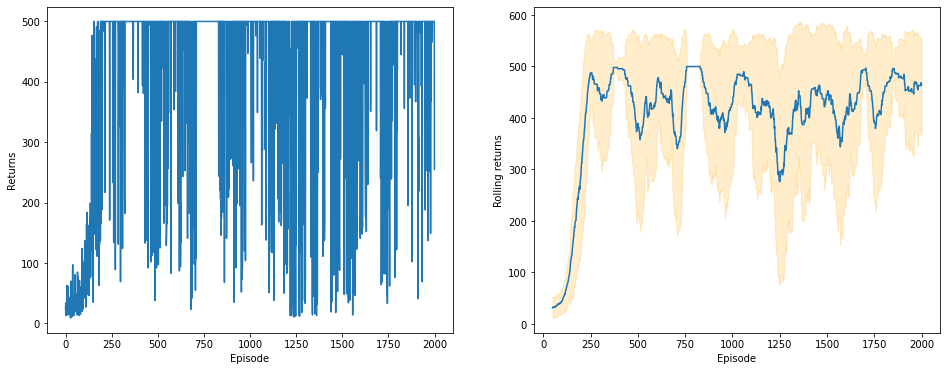

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

## Sutton's agent importance weighted

After playing an entire episode $\{(x_t, a_t, r_t)\}_{t=0}^T$ using policy $\pi_{\theta_0}(a|x)$, gradient is updated for each $(x_t, a_t, r_t)$ observed:
$$\nabla J(\theta_t) = \left(\sum_{k=t}^T R_k \right)\nabla_{\theta_t} log\pi_{\theta_t}(a_t|x_t) \frac{\pi_{\theta_t}(a_t|x_t)}{\pi_{\theta_0}(a_t|x_t)}$$
The idea here is that the estimate of gradient $\nabla J(\theta_t)$ in sutton's version is updating $\theta_t$ using the action $a_t$ played by another policy $\pi_{\theta_0}(a|x)$. So we need to correct for this bias by incorprating importance sampling in our MC estimate

In [2]:
# train sutton's agent importance weighted
sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
history = sutton_agent_imp_weighted.update_policy(
    max_episodes=2000,
    minibatch_size=1,
    save_pth='saved_models/cartpole_reinforce_sutton_importance_weighted.pth')

Episode: 100 | score: 59.88149332740102
Episode: 200 | score: 193.6207373938064
Episode: 300 | score: 259.57742455280555
Episode: 400 | score: 472.7786899455414
Episode: 500 | score: 499.9855904657471
Episode: 600 | score: 499.65537662714075
Episode: 700 | score: 177.07088728038195
Episode: 800 | score: 308.42164581649286
Episode: 900 | score: 218.06050421893315
Episode: 1000 | score: 499.3732003118434
Episode: 1100 | score: 499.99998335132346
Episode: 1200 | score: 499.9999999995578
Episode: 1300 | score: 499.98098409961136
Episode: 1400 | score: 442.20023513072334
Episode: 1500 | score: 499.2826378198206
Episode: 1600 | score: 499.09701050020107
Episode: 1700 | score: 499.9986556079697
Episode: 1800 | score: 475.93012250088304
Episode: 1900 | score: 499.9854109952131
Episode: 2000 | score: 499.99999961249574


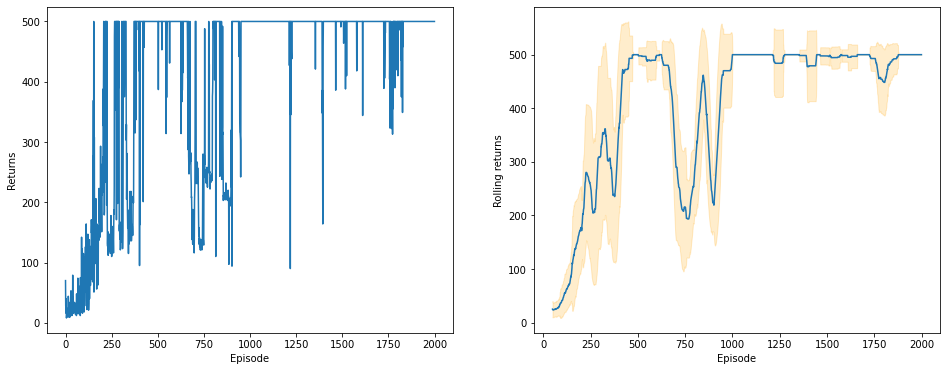

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

We can also do a minibatch training of our agent by updating the policy based on k steps at a time rather than just 1 step for an update. This would ensure that our policy $\pi_{\theta_t}(a|x)$ doesn't become too different that $\pi_{\theta_0}(a|x)$  in the course of an episode while also ensuring that we don't encode all the information recieved from an episode in a single step

In [4]:
# train minibatch sutton's agent importance weighted
minibatch_size = 4
sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
history = sutton_agent_imp_weighted.update_policy(
    max_episodes=2000,
    minibatch_size=minibatch_size,
    save_pth=f'saved_models/cartpole_reinforce_sutton_importance_weighted_minibatch_{minibatch_size}.pth')

Episode: 100 | score: 39.85738788199418
Episode: 200 | score: 74.41248367401738
Episode: 300 | score: 325.0377285747488
Episode: 400 | score: 253.38785500384964
Episode: 500 | score: 456.7236096904316
Episode: 600 | score: 499.9983904112366
Episode: 700 | score: 499.9999999572472
Episode: 800 | score: 450.1564313610636
Episode: 900 | score: 499.9591363785552
Episode: 1000 | score: 353.25357640140686
Episode: 1100 | score: 395.16017936662433
Episode: 1200 | score: 499.05615491454535
Episode: 1300 | score: 499.9999749301543
Episode: 1400 | score: 499.99999999933425
Episode: 1500 | score: 462.4469842957517
Episode: 1600 | score: 323.9610902930474
Episode: 1700 | score: 499.9947336519433
Episode: 1800 | score: 499.99999986011846
Episode: 1900 | score: 499.99999999999636
Episode: 2000 | score: 477.9268010914566


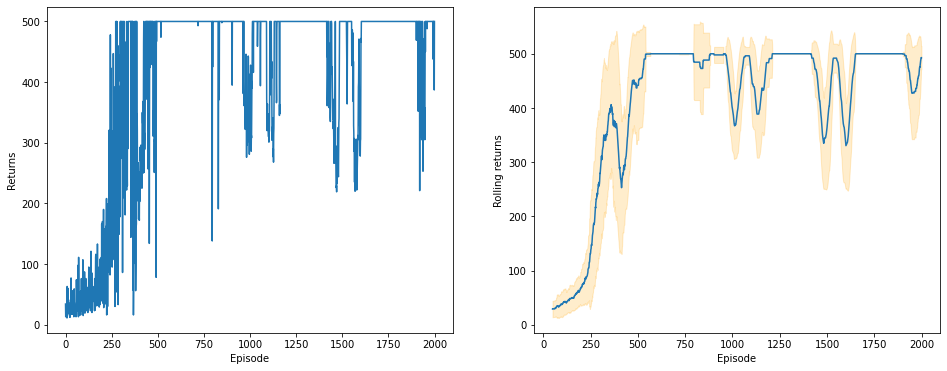

In [5]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

## Sutton's agent importance weighted but thresholded importance weights

After playing an entire episode $\{(x_t, a_t, r_t)\}_{t=0}^T$ using policy $\pi_{\theta_0}(a|x)$, gradient is updated for each $(x_t, a_t, r_t)$ observed:
$$\nabla J(\theta_t) = \left(\sum_{k=t}^T R_k \right)\nabla_{\theta_t} log\pi_{\theta_t}(a_t|x_t)\ max\left(M, \frac{\pi_{\theta_t}(a_t|x_t)}{\pi_{\theta_0}(a_t|x_t)} \right)$$
This is done to account for the high variance of the gradient estimate
For the experiments below $M=0.1$

In [2]:
# train sutton's agent importance weighted and thresholded
sutton_agent_imp_weighted_thresholded = SuttonAgentImportanceWeightedThresholded(env_name='CartPole-v1')
history = sutton_agent_imp_weighted_thresholded.update_policy(
    max_episodes=2000,
    minibatch_size=1,
    save_pth='saved_models/cartpole_reinforce_sutton_importance_weighted_thresholded.pth')

Episode: 100 | score: 25.48926206245274
Episode: 200 | score: 75.5592782595333
Episode: 300 | score: 229.27900280279283
Episode: 400 | score: 352.0763500581648
Episode: 500 | score: 394.0822572578684
Episode: 600 | score: 499.99283668608064
Episode: 700 | score: 473.38418655738946
Episode: 800 | score: 460.42659052976035


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

## Simulating the learning N times

In [2]:
N = 10
returns = {
    'david': [],
    'sutton': [],
    'sutton_imp_weighted': [],
    'sutton_imp_weighted_minibatched': [],
    'sutton_imp_weighted_thresholded': [],
    'sutton_imp_weighted_thresholded_minibatched': []
}
for trial in tqdm(range(N)):
    david_agent = DavidAgent(env_name='CartPole-v1')
    history = david_agent.update_policy(
        max_episodes=1800,
        save=False,
        logging=False,
        save_pth='')
    returns['david'].append(history)
    
    sutton_agent = SuttonAgent(env_name='CartPole-v1')
    history = sutton_agent.update_policy(
        max_episodes=1800,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton'].append(history)
    
    sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
    history = sutton_agent_imp_weighted.update_policy(
        max_episodes=1800,
        minibatch_size=1,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton_imp_weighted'].append(history)
    
    minibatch_sutton_agent_imp_weighted = SuttonAgentImportanceWeighted(env_name='CartPole-v1')
    history = minibatch_sutton_agent_imp_weighted.update_policy(
        max_episodes=1800,
        minibatch_size=4,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton_imp_weighted_minibatched'].append(history)
    
    sutton_agent_imp_weighted_thresholded = SuttonAgentImportanceWeightedThresholded(env_name='CartPole-v1')
    history = sutton_agent_imp_weighted_thresholded.update_policy(
        max_episodes=1800,
        minibatch_size=1,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton_imp_weighted_thresholded'].append(history)
    
    minibatch_sutton_agent_imp_weighted_thresholded = SuttonAgentImportanceWeightedThresholded(env_name='CartPole-v1')
    history = minibatch_sutton_agent_imp_weighted_thresholded.update_policy(
        max_episodes=1800,
        minibatch_size=4,
        save=False,
        logging=False,
        save_pth='')
    returns['sutton_imp_weighted_thresholded_minibatched'].append(history)

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: zero-dimensional tensor (at position 2) cannot be concatenated

In [22]:
non_cum_means = {k: np.mean(returns[k], axis=0) for k in returns}
non_cum_stds = {k: np.std(returns[k], axis=0) for k in returns}

cum_returns = {}
for agent, agent_returns in returns.items():
    cum_returns[agent] = [np.cumsum(agent_return) for agent_return in agent_returns]
        
cum_means = {k: np.mean(cum_returns[k], axis=0) for k in cum_returns}
cum_stds = {k: np.std(cum_returns[k], axis=0) for k in cum_returns}

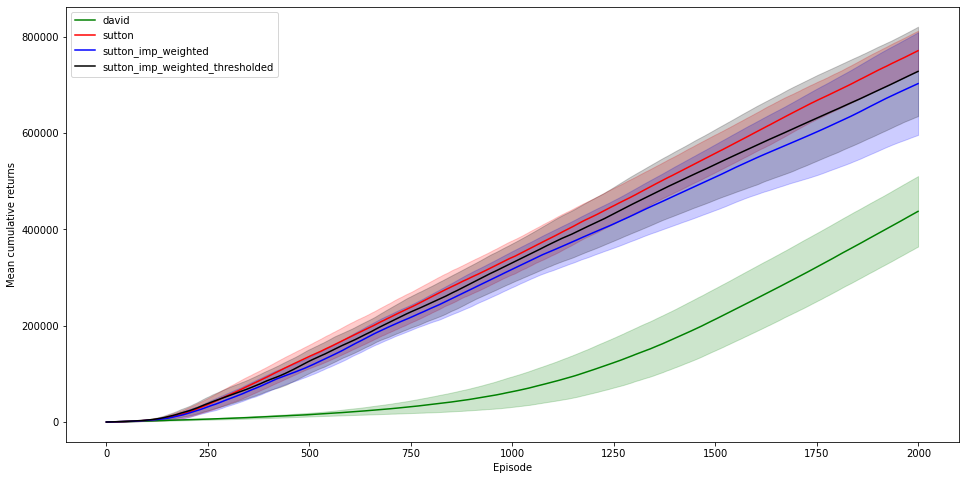

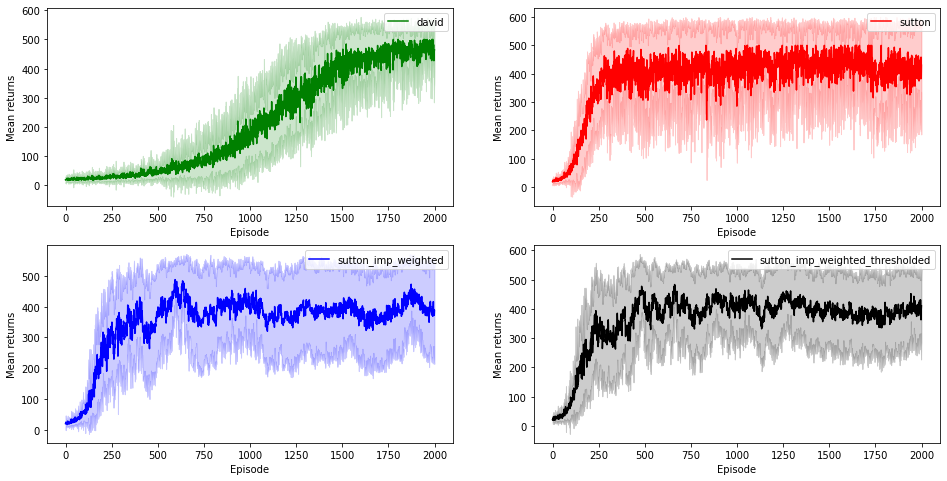

In [23]:
colors = ['g', 'r', 'b', 'black']
plt.figure(figsize=(16, 8))
# plt.subplot(1, 2, 1)
for i, k in enumerate(returns):
    plt.plot(range(len(cum_means[k])), cum_means[k], color=colors[i], label=k)
    plt.fill_between(range(len(cum_means[k])),cum_means[k]-cum_stds[k], cum_means[k]+cum_stds[k], color=colors[i], alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Mean cumulative returns')
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))

for i, k in enumerate(returns):
    plt.subplot(2, 2, i+1)
    plt.plot(range(len(non_cum_means[k])), non_cum_means[k], color=colors[i], label=k)
    plt.fill_between(range(len(non_cum_means[k])),non_cum_means[k]-non_cum_stds[k], non_cum_means[k]+non_cum_stds[k], color=colors[i], alpha=0.2)
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Mean returns')



plt.show()

David's agent is expected to learn at slower rate compared to other agents as the number of updates to the policy per episode is just one for david's agent but equal to the length of episode for other agents. Even thought david's agent might have the best step direction to pursue for the agent, the agent is eventually taking a small step in that direction, making it a slow learner.

Observations:
1. All four models learn equally well but at very different rates leading to the different mean cumulative returns trajectory
2. Sutton's agent has high variance if you look at the mean returns but low variance for cumulative returns. This is expected since the biased estimate of the gradient might take you in the wrong direction for a couple of time steps but the overall performance across different training runs is consisetent
3. In addition to that, all the agents have attained constant slope by episode 2000 meaning that they are generating their maximum returns by then and we don't need to run the simulations for longer
4. Standard deviations of the sutton's agent and sutton's importance weighted thresholded agents intersect, implying that both agents work equally well. In fact sutton's model is a special case of the sutton's importance weighted thresholded model: $$min\left(1, max\left(1, \frac{pi_{theta_t}(a_t|x_t)}{pi_{theta_0}(a_t|x_t)} \right) \right)$$
5. IMO, Sutton's importance weighted thresholded agent seems better than all other agents because it's less biased than sutton's model while yielding similar performace and also has less variance for mean returns across episodes

Things I don't understand right now:
1. SGD sucks compared to Adam for all four algorithms (tried a whole lot of different learning rates)